# Hand-Written digit recognition :

In [26]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
# Ae we are passing an image , so how do make it an neuron. 
#----> The  image of the digits is 2-D image and the each pixel of the image is represent by a pixel.
# 0-Black and 255-White and between are shaded between white and black.
# So simply we have these pixels as our 2-D array.

In [28]:
# Importing hand-written digits dataset and splitting into train and test data :
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
# Lets check the info of the train data :
print(len(x_train))
print(x_train[0].shape)
print(x_train[0])

# We can see its 28x28 grid so there are around 784 neurons.

60000
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253

<Figure size 576x432 with 0 Axes>

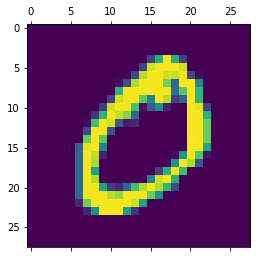

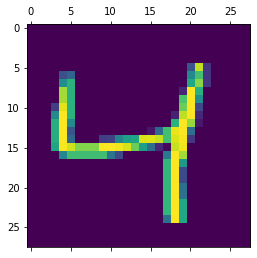

In [30]:
# Noe lets try to plot the images :
plt.figure(figsize=(8,6))
plt.matshow(x_train[1])
plt.matshow(x_train[2])
plt.show()

In [31]:
len(x_test)

10000

In [32]:
# Lets scale the data for better accuracy :
x_train = x_train / 255
x_test = x_test / 255

In [33]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
# Now we have the 2-D array but we want 1-D , so lets flattend the array :
x_train_1d = x_train.reshape(len(x_train),28*28)
x_test_1d = x_test.reshape(len(x_test),28*28)

In [35]:
x_train_1d.shape

(60000, 784)

In [36]:
# At very 1st attempt we are having just single layred neural network :
# Now we are going to use .Sequential() which defines the stack of the layers , Since it is an stack it will accept each 
# layer as one element.

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [37]:
model.fit(x_train_1d, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4728 - accuracy: 0.8766
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3046 - accuracy: 0.9146
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9196
Epoch 4/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2735 - accuracy: 0.9238


In [38]:
# Now Lets check accuracy for test data :
model.evaluate(x_test_1d, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2707 - accuracy: 0.9255


[0.27069342136383057, 0.9254999756813049]

In [40]:
y_pred = model.predict(x_test_1d)
y_pred


array([[7.0161283e-02, 7.3341505e-07, 8.6663753e-02, ..., 9.9978471e-01,
        1.2061122e-01, 5.2210766e-01],
       [5.4343367e-01, 4.8828721e-03, 9.9913150e-01, ..., 6.1776959e-12,
        2.5116396e-01, 1.0590526e-08],
       [8.1911683e-04, 9.9306065e-01, 6.3837713e-01, ..., 1.5525508e-01,
        3.7979597e-01, 3.8984418e-02],
       ...,
       [8.6905984e-06, 5.6205140e-06, 1.1718273e-03, ..., 1.6417745e-01,
        5.1925713e-01, 6.3063180e-01],
       [3.4785271e-04, 2.1246076e-04, 2.4920702e-04, ..., 4.9046866e-05,
        6.3771844e-01, 1.3014674e-04],
       [2.4707586e-02, 1.5358032e-09, 1.7694888e-01, ..., 9.4875162e-08,
        4.2840838e-04, 1.7577612e-06]], dtype=float32)

In [44]:
y_pred_l = [np.argmax(i) for i in y_pred]

In [60]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [61]:
y_pred_l[:4]

[7, 2, 1, 0]

In [47]:
# Display the confusion matrix :
results  = tf.math.confusion_matrix(labels= y_test, predictions=y_pred_l)
print(results)

tf.Tensor(
[[ 967    0    0    1    0    5    2    3    2    0]
 [   0 1111    3    2    0    2    4    2   11    0]
 [   9    9  927   14    8    2   11   11   39    2]
 [   5    0   20  915    0   26    1   12   25    6]
 [   2    1    6    1  931    0    6    2   11   22]
 [  10    2    5   33    8  782   10    6   33    3]
 [  17    3    8    1    8   16  899    2    4    0]
 [   1    5   24    6    8    0    0  955    5   24]
 [   7    6    6   18    9   26    7   11  880    4]
 [  11    7    1   11   40    9    0   32   10  888]], shape=(10, 10), dtype=int32)


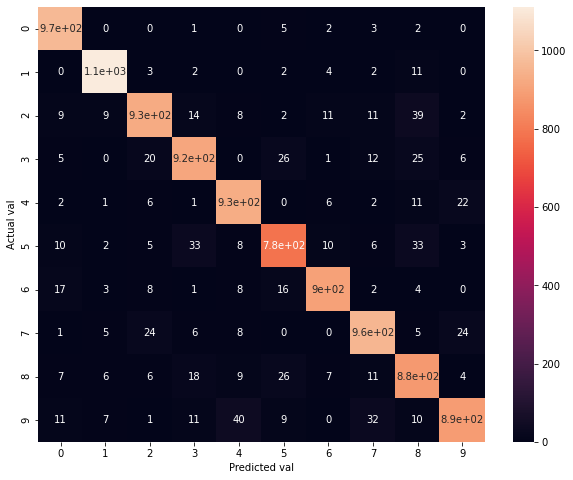

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(results, annot=True)
plt.xlabel('Predicted val')
plt.ylabel('Actual val')
plt.show()

In [51]:
# Now add some hidden layers and check the accuracy :
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
model1.fit(x_train_1d, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1235 - accuracy: 0.9634
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9740
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9873


In [54]:
model1.evaluate(x_test_1d, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9763


[0.07906701415777206, 0.9763000011444092]